In [34]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
import cv2
import scipy.misc

In [35]:
dados = np.loadtxt('ocr_car_numbers_rotulado.txt')

In [103]:
def getImage(data, row):
    image = data[row, :-1] #seleciona a lilha e apaga o útima coluna
    image.shape = (35, 35) #converte para duas dimensões
    image[image==1]=255
    image = np.uint8(image)
    return image

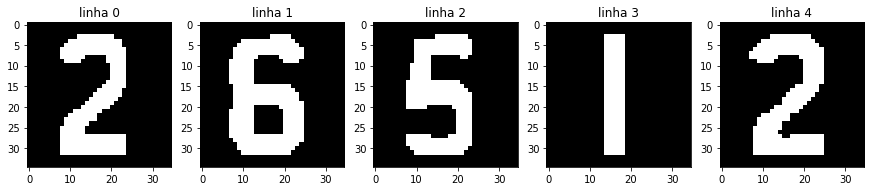

In [104]:
linhas = 5

imgs = [getImage(dados, i) for i in range(len(dados))]

plt.figure(figsize=(15,10))
for i in range(linhas):
    plt.subplot(1,linhas,i+1)
    plt.subplot(1,linhas,i+1).set_title('linha ' + str(i))
    plt.imshow(imgs[i], 'gray')

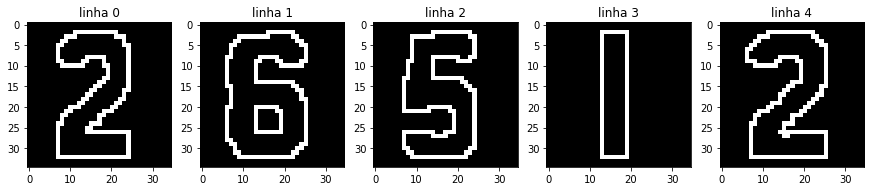

In [105]:
kernel = np.ones((3,3), np.uint8)
edges = [cv2.dilate(img, kernel, iterations=1) - img for img in imgs] #array de bordas do array de imagens
 
plt.figure(figsize=(15,10))
for i in range(linhas):
    plt.subplot(1,linhas,i+1)
    plt.subplot(1,linhas,i+1).set_title('linha ' + str(i))
    plt.imshow(edges[i], 'gray')

In [106]:
def verifyNeighborhood(image, point):
    print(point)
    if image[point[0]-1, point[1]] == 255:
        image[point[0]-1, point[1]] = 0
        print('0')
        return 0, [point[0]-1, point[1]]
    
    elif image[point[0], point[1]+1] == 255:
        image[point[0], point[1]+1] = 0
        print('1')
        return 1, [point[0], point[1]+1]
    
    elif image[point[0]+1, point[1]] == 255:
        image[point[0]+1, point[1]] = 0
        print('2')
        return 2, [point[0]+1, point[1]]
    
    elif image[point[0], point[1]-1] == 255:
        image[point[0], point[1]-1] = 0
        print('3')
        return 3, [point[0], point[1]-1]
    else:
        return 'none'

In [107]:
n_contours = []
newImgs = []
chainCodes = []

for i in range(10):
    newIm = edges[i].copy()
    
    ch = []

    max_xy = np.where(newIm == 255)    

    #print(max_xy[0][0], max_xy[1][0])

    newImgRGB = np.zeros([35,35,3])
    newImgRGB[:,:,0] = newImgRGB[:,:,1] = newImgRGB[:,:,2] = imgs[i]

    cv2.circle(newImgRGB, [max_xy[1][0], max_xy[0][0]], int(3), (0, 0, 255), 2)
    
    startPoint = [max_xy[0][0], max_xy[1][0]]
    
    d, point = verifyNeighborhood(newIm, startPoint)
    points = []
    points.append([point[1], point[0]])
    ch.append(d)

    while(point != startPoint):
        #cv2.circle(newImgRGB, (point[1],point[0]), int(7), (0, 0, 255), 1)
        #cv2.imshow('image', newImgRGB)
        #cv2.waitKey(0)
        
        #cv2.circle(newImgRGB, (point[1],point[0]), int(7), (0, 0, 255), 1)
        d, point = verifyNeighborhood(newIm, point)
        points.append([point[1], point[0]])
        ch.append(d)
        
    contours = []
    contours.append(np.array(points, np.int32))
    n_contours.append(contours)
    chainCodes.append(ch)

[2, 11]
1
[2, 12]
1
[2, 13]
1
[2, 14]
1
[2, 15]
1
[2, 16]
1
[2, 17]
1
[2, 18]
1
[2, 19]
1
[2, 20]
1
[2, 21]
2
[3, 21]
1
[3, 22]
1
[3, 23]
2
[4, 23]
2
[5, 23]
1
[5, 24]
2
[6, 24]
2
[7, 24]
2
[8, 24]
2
[9, 24]
2
[10, 24]
2
[11, 24]
2
[12, 24]
2
[13, 24]
2
[14, 24]
2
[15, 24]
2
[16, 24]
3
[16, 23]
2
[17, 23]
2
[18, 23]
3
[18, 22]
2
[19, 22]
3
[19, 21]
2
[20, 21]
3
[20, 20]
2
[21, 20]
3
[21, 19]
3
[21, 18]
2
[22, 18]
3
[22, 17]
2
[23, 17]
2
[24, 17]
3
[24, 16]
3
[24, 15]
2
[25, 15]
2
[26, 15]
1
[26, 16]
1
[26, 17]
1
[26, 18]
1
[26, 19]
1
[26, 20]
1
[26, 21]
1
[26, 22]
1
[26, 23]
1
[26, 24]
2
[27, 24]
2
[28, 24]
2
[29, 24]
2
[30, 24]
2
[31, 24]
2
[32, 24]
3
[32, 23]
3
[32, 22]
3
[32, 21]
3
[32, 20]
3
[32, 19]
3
[32, 18]
3
[32, 17]
3
[32, 16]
3
[32, 15]
3
[32, 14]
3
[32, 13]
3
[32, 12]
3
[32, 11]
3
[32, 10]
3
[32, 9]
3
[32, 8]
3
[32, 7]
0
[31, 7]
0
[30, 7]
0
[29, 7]
0
[28, 7]
0
[27, 7]
0
[26, 7]
0
[25, 7]
0
[24, 7]
1
[24, 8]
0
[23, 8]
0
[22, 8]
1
[22, 9]
0
[21, 9]
1
[21, 10]
0
[20, 10]
1
[20

[17, 24]
2
[18, 24]
2
[19, 24]
2
[20, 24]
2
[21, 24]
2
[22, 24]
2
[23, 24]
2
[24, 24]
2
[25, 24]
2
[26, 24]
2
[27, 24]
2
[28, 24]
2
[29, 24]
2
[30, 24]
3
[30, 23]
2
[31, 23]
3
[31, 22]
2
[32, 22]
3
[32, 21]
3
[32, 20]
3
[32, 19]
3
[32, 18]
3
[32, 17]
3
[32, 16]
3
[32, 15]
3
[32, 14]
3
[32, 13]
3
[32, 12]
3
[32, 11]
3
[32, 10]
0
[31, 10]
3
[31, 9]
3
[31, 8]
0
[30, 8]
0
[29, 8]
3
[29, 7]
0
[28, 7]
3
[28, 6]
0
[27, 6]
0
[26, 6]
0
[25, 6]
0
[24, 6]
0
[23, 6]
0
[22, 6]
0
[21, 6]
0
[20, 6]
1
[20, 7]
0
[19, 7]
0
[18, 7]
0
[17, 7]
0
[16, 7]
0
[15, 7]
0
[14, 7]
0
[13, 7]
0
[12, 7]
0
[11, 7]
0
[10, 7]
0
[9, 7]
0
[8, 7]
0
[7, 7]
0
[6, 7]
1
[6, 8]
0
[5, 8]
0
[4, 8]
1
[4, 9]
0
[3, 9]
1
[3, 10]
1
[3, 11]
0


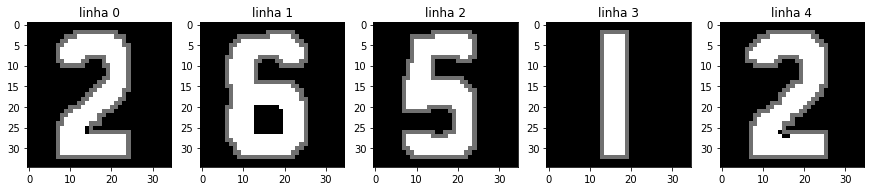

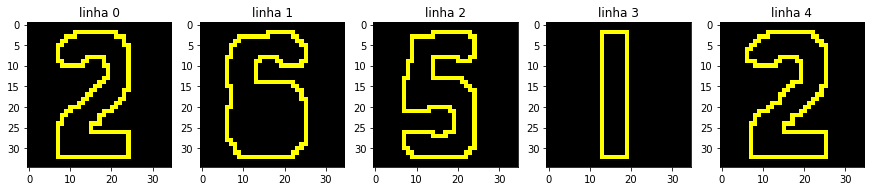

In [108]:
newImgs = []
chainCodes = []

for i in range(10):
    newImg = np.zeros([35,35,3])
    newImg = np.uint8(newImg)

    for ind_contour in range(len(contours)):
        
        imgs[i] = cv2.polylines(imgs[i][:],n_contours[i],True,(112,255,255),1)#desenhando o poligono de acordo com os pontos
        newImg = cv2.polylines(newImg,n_contours[i],True,(0,255,255),1)#desenhando o poligono de acordo com os pontoslen(edges)
    
    newImgs.append(newImg)

        
plt.figure(figsize=(15,10))
for i in range(linhas):
    plt.subplot(1,linhas,i+1)
    plt.subplot(1,linhas,i+1).set_title('linha ' + str(i))
    plt.imshow(imgs[i], 'gray')
    
plt.figure(figsize=(15,10))
for i in range(linhas):
    newImgs[i] = cv2.cvtColor(newImgs[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,linhas,i+1)
    plt.subplot(1,linhas,i+1).set_title('linha ' + str(i))
    plt.imshow(newImgs[i], 'gray')

In [109]:
a = len(n_contours)
b = len(edges)
print(a, b)

10 3352


In [110]:
len(chainCodes)

0

In [27]:
signal = [0, 3, 2, 1, 2, 3, 1, 0, 3, 2, 1, 3, 2, 0, 1, 0]
smaller = 5

def box(signal, smaller):
    
    index = 0
    newSignal = []
    prop = len(signal)/smaller
    d = prop
    
    while len(newSignal) < smaller:
        
        newSignal.append(signal[index])
        i, d = divmod(d, 1) #separa a pater inteira da parte decimal
        index += int(i) #adiciona a parte inteira ao indice
        d += prop #adiciona ao resto a proporcao        
        
    return newSignal    
        
    
    
box(signal, smaller)
    

[0, 1, 1, 2, 2]

In [ ]:
tamanhos_cadeias = [len(chainCode) for chainCode in chainCodes]
smaller = min(tamanhos_cadeias)
chainCodes = [box(chainCode, smaller) for chainCode in chainCodes]

In [ ]:
from skimage.feature import greycomatrix, greycoprops
from skimage.feature import local_binary_pattern


LBP_FE(image)
def LBP_FE(image):
        lbp_image = local_binary_pattern(image, 256, 1, "uniform")
        return np.histogram(lbp_image.ravel(), bins=256)
HU_FE
def HU_FE(image):
        moments = cv2.moments(image.astype(np.float64))
        return np.asarray( cv2.HuMoments(moments).flatten())
GLCM_FE
def GLCM_FE(image):
        glcm = greycomatrix(image, [1], [0], 256, symmetric=True, normed=True)
        xs = []
        xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
        xs.append(greycoprops(glcm, 'correlation')[0, 0])
        xs.append(greycoprops(glcm, 'homogeneity')[0, 0])
        xs.append(greycoprops(glcm, 'ASM')[0, 0])
        xs.append(greycoprops(glcm, 'energy')[0, 0])
        xs.append(greycoprops(glcm, 'correlation')[0, 0])
        return np.asarray(xs);


In [ ]:
n_contours[0]
convexHulls = [cv2.convexHull(contours[0]) for contours in n_contours]

convexHulls[3][0][0][0]

In [ ]:
newImgs = []

for i in range(len(edges)):
    
    newImg = np.zeros([35,35,3])
    newImg = np.uint8(newImg)

    for ind_contour in range(len(contours)):
        for point in convexHulls[i]:
            newImg[point[0][1], point[0][0]] = [0,0,255]        
        
    newImgs.append(newImg)
    
plt.figure(figsize=(15,10))
for i in range(linhas):
    newImgs[i] = cv2.cvtColor(newImgs[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,linhas,i+1)
    plt.subplot(1,linhas,i+1).set_title('linha ' + str(i))
    plt.imshow(newImgs[i], 'gray')

In [ ]:
nweIgm = imgs[0].copy()

newImg = np.float32(newImg)
#newImg = cv2.cvtColor(newImg,cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(newImg,2,3,0.04)

dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [ ]:
def distancia(p1, p2):    
    from math import sqrt

    xA = p1[0]
    xB = p1[1]

    yA = p2[0]
    yB = p2[1]

    # Calculando a distância
    dist = sqrt((xA-xB)**2) + ((yA-yB)**2)
    return dist

distancia([],[])

In [ ]:
from sklearn.metrics import confusion_matrix

def pretty_confusion_matrix(y_true, y_pred, labels=['False', 'True']):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted' + l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    
y_pred = model.predict(X_test) > 0.5
pretty_confusion_matrix(y_test, y_pred, ['0', '1'])

In [ ]:
n_contours[0]
convexHulls = [cv2.convexHull(contours[0]) for contours in n_contours]

newImgs = []

for i in range(len(edges)):    
        
    newImg = np.zeros([35,35,3])
    newImg = np.uint8(newImg)
    newImg[:,:,0] = newImg[:,:,1] = newImg[:,:,2] = imgs[i]

    for ind_contour in range(len(contours)):
        newImg = cv2.drawContours(newImg, convexHulls[i], -1, (0,0,255), 2)       
        
    newImgs.append(newImg)
    
plt.figure(figsize=(15,10))
for i in range(linhas):
    newImgs[i] = cv2.cvtColor(newImgs[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,linhas,i+1)
    plt.subplot(1,linhas,i+1).set_title('linha ' + str(i))
    plt.imshow(newImgs[i], 'gray')

In [ ]:
X = chainCodes
y = dados[:,-1]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20)

for train_index, test_index in sss.split(X,Y):
    X_train, X_test  = X[test_index], X[test_index]
    y_train, y_test  = X[test_index], X[test_index]
    
    indexs, c = np.unique(y_test, return_counts=True)
    print('Quantidade de amostras por classe: {} {}'.format(c, np.sum(c)))
    
    #KNN train
    neigh = KNeighborsClassifier(n_neighbors=9)
    neigh.fit(X_train, y_train)
    
    #KNN test
    y_predicted = neigh.predict(X_test)
    
    print('Real\:\n{}\nPredito\n{}'.format(y_test, y_predicted))
    
    acc = np.sum(y_test == y_predicted)/len(y_test)
    print(acc)

In [ ]:
plt.hist(y, bins = [0,1,2,3,4,5,6,7,8,9]) 
plt.title("histogram") 
plt.show()

histogram = np.histogram(y, bins = [0,1,2,3,4,5,6,7,8,9]) 
print(histogram)